In [1]:
import numpy as np
from spatialmath import *
from math import pi

import matplotlib.pyplot as plt
%matplotlib notebook 

**Consider the following scenario:**

We have a drone with a camera that is circling around an object of interest located at $H_{obj}$ to get a full 360 degree view of the object. The drone is currently at pose $H_{D}$ in the world frame. Its camera sees pose $H_{T-cam}$ (camera frame) as the next pose that the camera should be at to view the object. The goal is to move the drone to the target pose $H_{T-drone}$ (world frame) to such that its camera is in the correct next pose to view the object ($H_{T-cam}$ as seen from the camera). 

**Task definition:**

*Given:*
- $H_{O}$: Origin of world frame.
- $H_{obj}$: Object pose w.r.t. world frame.
- $H_{D}$: Initial pose of the drone center w.r.t. world frame.
- $H_{C}$: Pose of the camera w.r.t. the drone center. It has the same orientation as the drone center, just translated down in the z-axis by 1 unit. Camera is pointing in positive x-axis direction
- $H_{T-cam}$: Next camera pose in camera frame.

*Find:*
- $H_{T-drone}$: Target pose of the drone in world frame.
- $H_{move}$: Transformation to move the drone

Initializing given variables

In [2]:
H_o = SE3()    # Origin
H_obj = SE3(2,2,2)  # Object located at (x,y,z) = (2,2,2) in world coordinates

# Starting pose of drone center w.r.t. world frame
# Camera attached to drone is pointing in positive x-axis direction
# Starting pose camera is looking directly at the object
H_d = SE3(5,2,3) * SE3.Rz(180, 'deg')

# Camera pose w.r.t. drone center
# It has same orientation as drone, just translated down 1 unit in the z-axis
H_c = SE3.Tz(-1)

Calculate camera pose in terms of world frame

In [3]:
# Retrieve the camera pose w.r.t. world frame
H_c_world = H_d * H_c

Plotting initial set-up

<IPython.core.display.Javascript object>


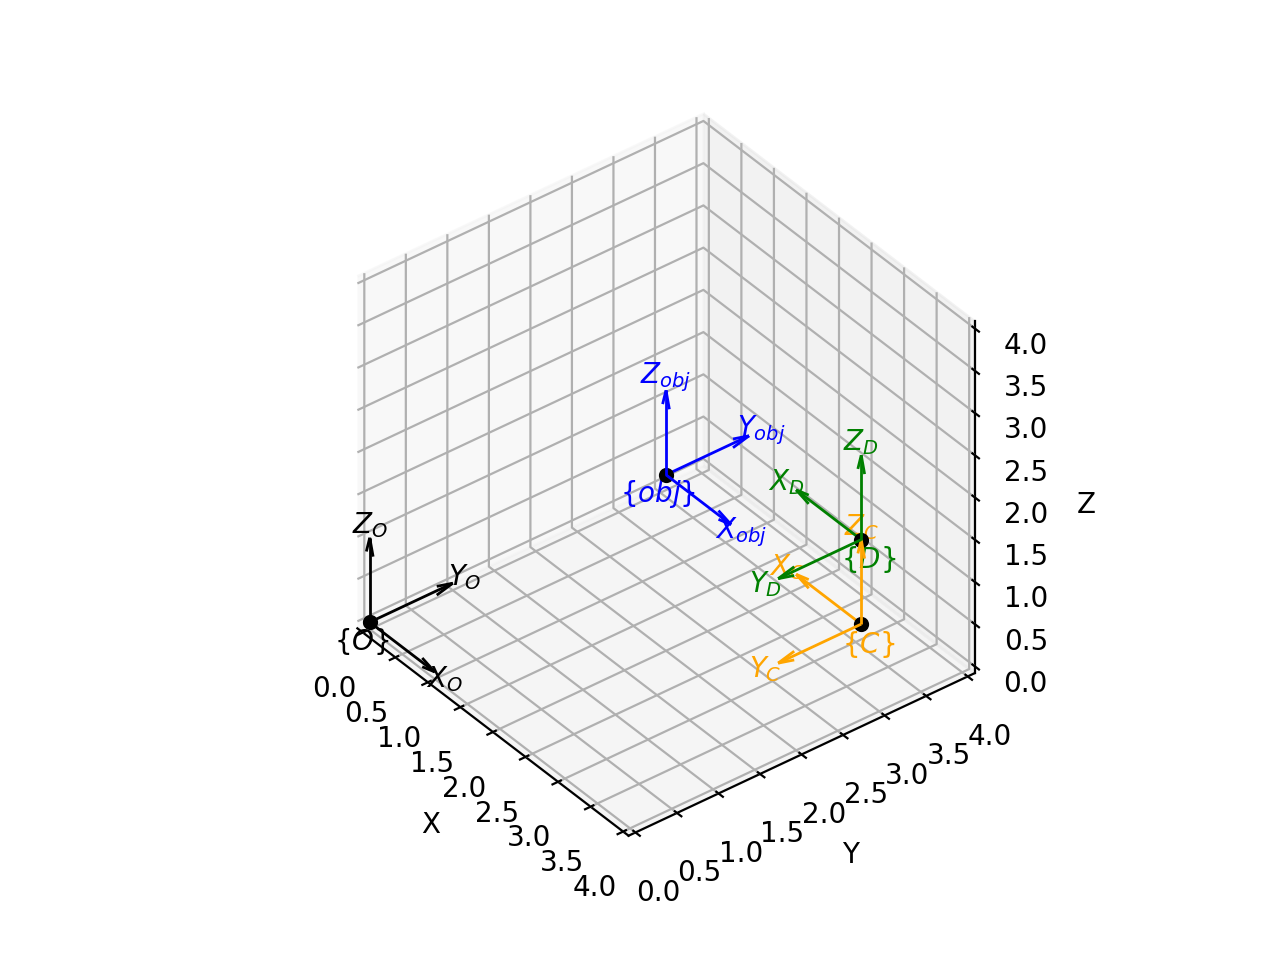

In [4]:
H_o.plot(frame='O', color='black', dims=[0,4])
H_obj.plot(frame='obj', color='blue', dims=[0,4])
H_d.plot(frame='D', color='green', dims=[0,4])
H_c_world.plot(frame='C', color='orange', dims=[0,4])

From the camera's point of view, it is currently looking at the object. In the next camera pose, the goal is to look at the right side of the object.

In [5]:
# Next camera pose seen in the camera
# This can be interpreted as moving to the right face of the object (from camera's
# perspective) and rotating 90 degrees counter-clockwise in the z-axis.
H_tcam = SE3(3,-3,0) * SE3.Rz(90, 'deg')

Calculate camera pose in terms of world frame

In [6]:
# Retrieve the next camera pose w.r.t. world fram
H_tcam_world = H_c_world * H_tcam

Plotting complete set-up

<IPython.core.display.Javascript object>


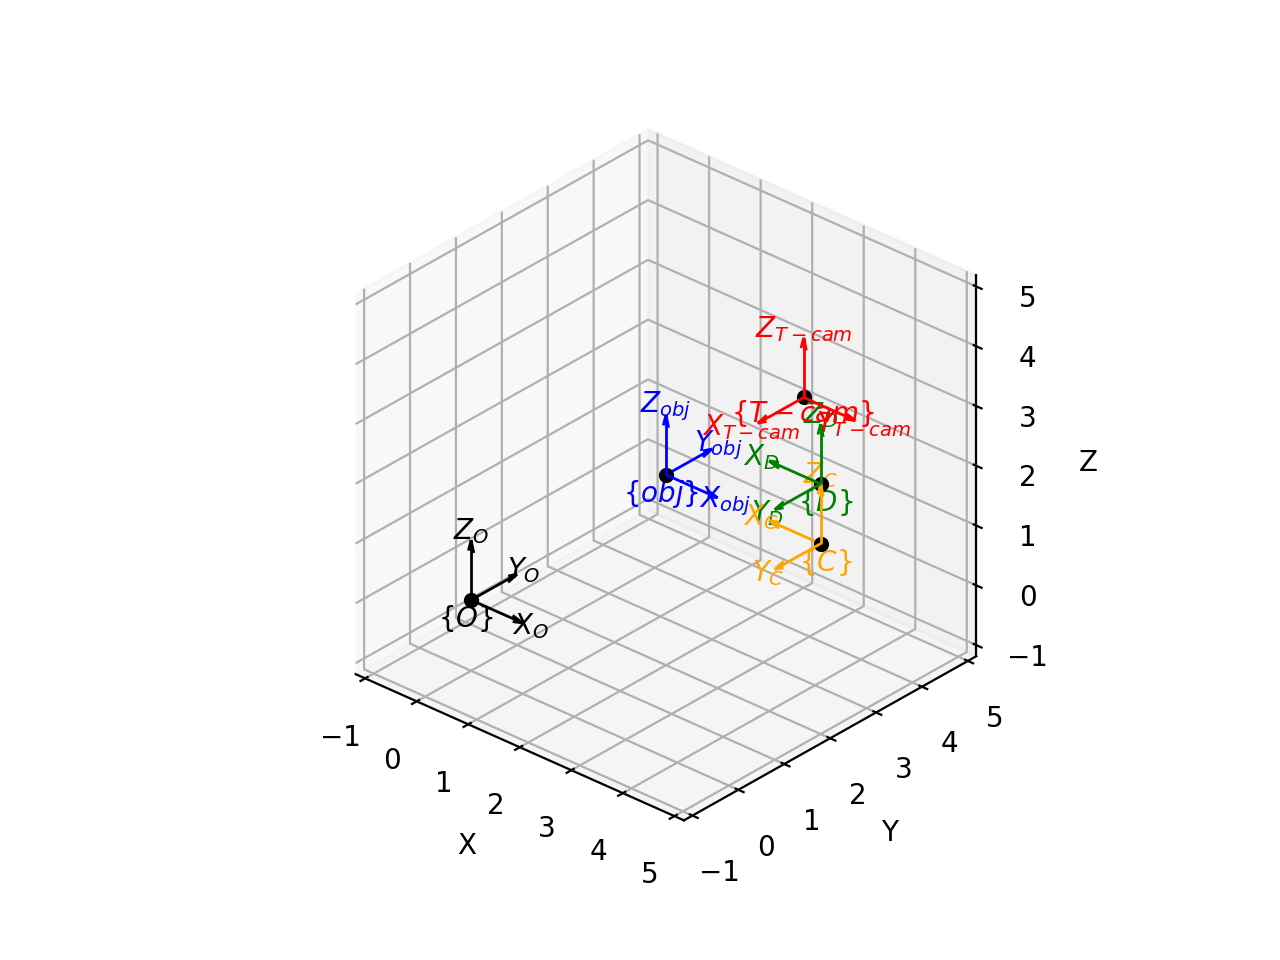

In [7]:
H_o.plot(frame='O', color='black', dims=[0,4])
H_obj.plot(frame='obj', color='blue', dims=[0,4])
H_d.plot(frame='D', color='green', dims=[0,4])
H_c_world.plot(frame='C', color='orange', dims=[0,4])
H_tcam_world.plot(frame='T-cam', color='red', dims=[0,4])

Determine $H_{T-drone}$.

$H_C$ is the position of the camera relative to the drone center. Then $H_C^{-1}$ is the position of the drone center relative to the camera. Hence, $H_{T-drone} = H_{T-cam-world} \cdot H_C^{-1}$.

Note that $H_C^{-1}$ is just a positive translation in the z-axis by 1 unit.

In [8]:
H_c.inv()

   1         0         0         0         
   0         1         0         0         
   0         0         1         1         
   0         0         0         1         


<IPython.core.display.Javascript object>


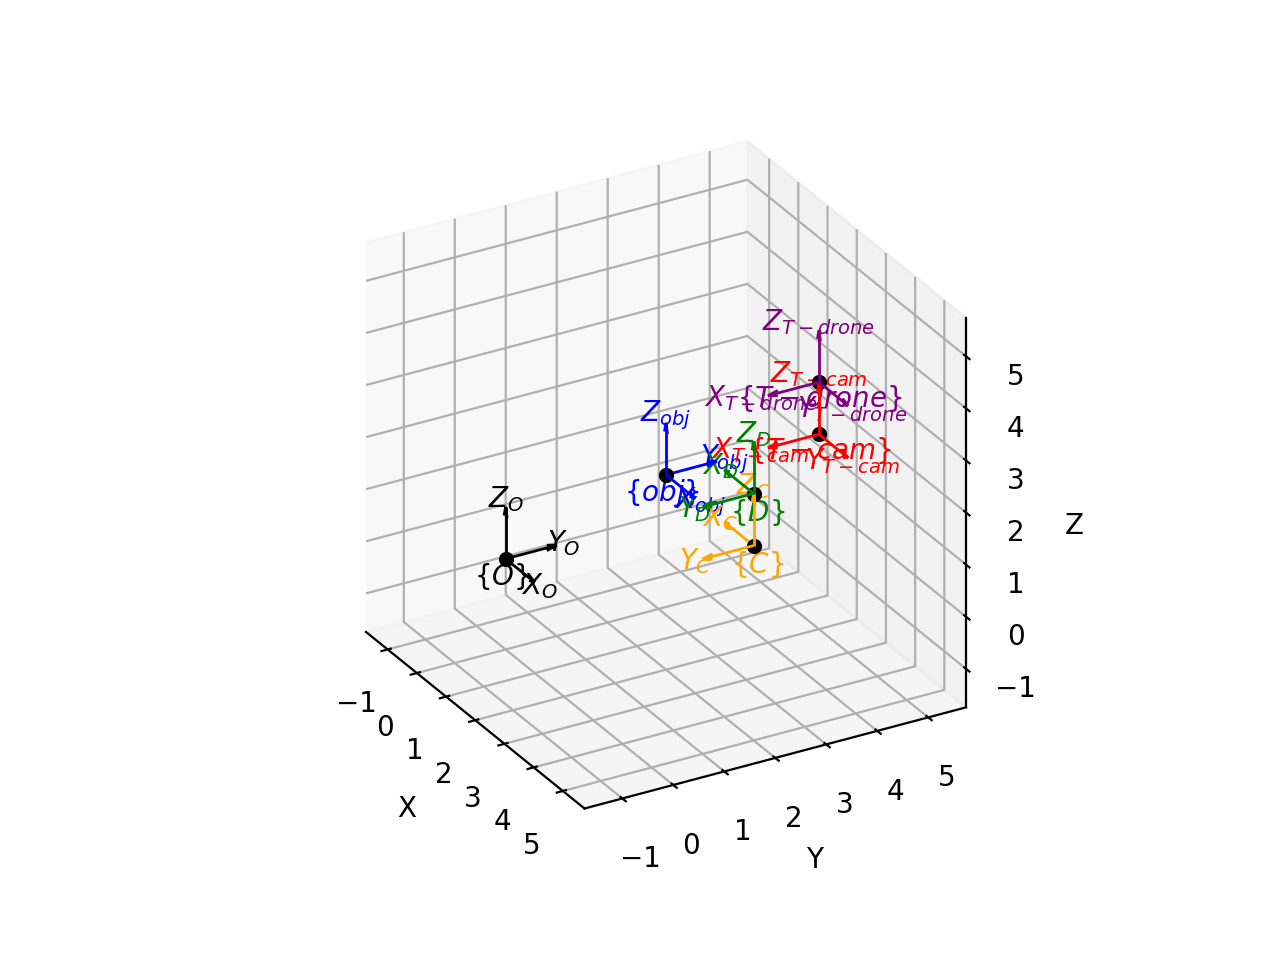

In [9]:
H_tdrone = H_tcam_world * H_c.inv()
H_tdrone.plot(frame='T-drone', color='purple', dims=[0,4])

# Plot the rest
H_o.plot(frame='O', color='black', dims=[0,4])
H_obj.plot(frame='obj', color='blue', dims=[0,4])
H_d.plot(frame='D', color='green', dims=[0,4])
H_c_world.plot(frame='C', color='orange', dims=[0,4])
H_tcam_world.plot(frame='T-cam', color='red', dims=[0,4])

Now find $H_{move}$

\begin{align}
H_D \cdot H_{move} &= H_{T-drone} \\
H_{move} &= H_D^{-1} \cdot H_{T-drone}
\end{align}

In [10]:
H_move = H_d.inv() * H_tdrone
H_move

   0        -1         0         3         
   1         0         0        -3         
   0         0         1         0         
   0         0         0         1         


$H_{move}$ should be the same as $H_{T-cam}$

In [11]:
H_move == H_tcam

True